# Assignment 1

During this first assignment you will create your own dataset, implement and perform linear regression and investigate its results with different datasets.

1. Create datasets, set noise, add outliers, create large/small set
2. Perform Least squares with SK learn
3. Implement least squares manually
4. Bonus

Publish your notebook to Machine Learning repository on Github.

### Deadline 28 September 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# Creating the dataset

In order to create the dataset we will use the [scikit-learn](http://scikit-learn.org/) toolkit (install first!). Specifically the [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function, which generates a dataset that is a good target for regression.

## Problem 1
Create several different datasets. Vary their sizes, levels of noise and add some outliers.

It is only necessary to create them (you can visualize them for yourself, but you don't need to hand this in). You are going to use them in the next problem.

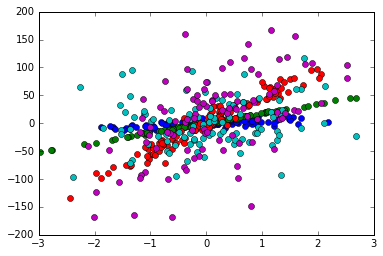

In [2]:
from sklearn.datasets import make_regression

noise = 5 #Standard deviation of added Gaussian noise
n_samples = 100 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
(x1_test,y1_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=noise)
plt.plot(x1,y1,'o')

############### More DATASETS

(x2,y2) = make_regression(n_samples=100, n_features=n_dimensions, noise=1)
plt.plot(x2,y2,'o')
(x2_test,y2_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=1)

(x3,y3) = make_regression(n_samples= 100, n_features=n_dimensions, noise=10)
plt.plot(x3,y3,'o')
(x3_test,y3_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=10)

(x4,y4) = make_regression(n_samples= 100, n_features=n_dimensions, noise=40)
plt.plot(x4,y4,'o')
(x4_test,y4_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=40)

(x5,y5) = make_regression(n_samples= 100, n_features=n_dimensions, noise=60)
plt.plot(x5,y5,'o')
(x5_test,y5_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=60)




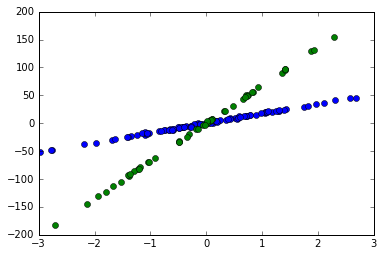

In [3]:
# plotting training set and test set with low noise
plt.plot(x2,y2,'o')
plt.plot(x2_test,y2_test, 'o')

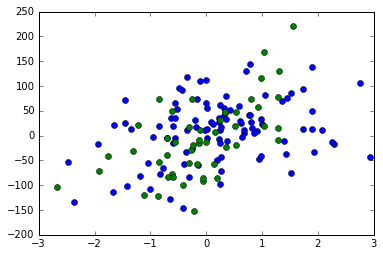

In [83]:
#plotting training set and test set with high noise
plt.plot(x5,y5,'o')
plt.plot(x5_test,y5_test, 'o')

In [84]:
# Perform Linear Regression

Scikit-learn has an implementation of [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Below you see an example of how to use it.

## Problem 2
Use the scikit-learn method to fit your own datasets. What is the effect on the score of varying the amount of noise?

SyntaxError: invalid syntax (<ipython-input-84-21cadc6eec66>, line 3)

0.971514057823
0.816692485127
0.798261574584
0.406853378969
0.204110564616


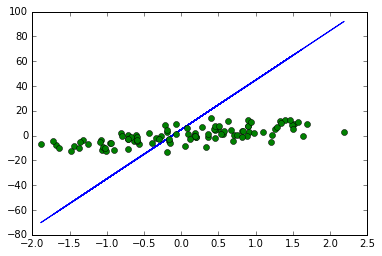

In [4]:
from sklearn.linear_model import LinearRegression

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()

#Fit the regression object on the data
regr.fit(x1,y1)
regr.fit(x2,y2)
regr.fit(x3,y3)
regr.fit(x4,y4)
regr.fit(x5,y5)

#Print the score that the fit has
print regr.score(x1_test,y1_test)
print regr.score(x2_test,y2_test)
print regr.score(x3_test,y3_test)
print regr.score(x4_test,y4_test)
print regr.score(x5_test,y5_test)

#Plot the resulting line
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()



## Your analysis

the score of the fit is (1 - u/v) with u is the mean-squared error and v is the variance. If the mean squared error is really small you get a score close to 1, which is the best outcome. A model that would always predicts the expected value of y, disregarding the input features, would get a score of 0.0. So either close to zero or close to 1 is a good score for the fit. A score right inbetween 1 and 0 is not good. My scores, at a certain point, from up to down were (Note that all datasets have same sample-size): 
x1/y1 with noise 5  (score = 0.975777569304)
x2/y2 with noise 1  (score = 0.94310390909)
x3/y3 with noise 10 (score = 0.815750659332)
x4/y4 with noise 40 (score = 0.616408027376)
x5/y5 with noise 60 (score = 0.642241550818)
(note: the returned scores at the moment are different from what I wrote down here, because I ran this whole program again after noting these scores and the scores differ everytime you run the program)

So this shows that when the noise is smaller but not too small (noise = 5) gives the best score. However a noise of 1 also provides a pretty good score since score is close to 1 as well. You see that when the noise grows particularly bigger, the fit becomes less good, because the score is more in the middle of 1 and 0.

However, as I plotted the training and test sets for both a dataset with low noise (x2/y2) and with a high noise (x5/y5), you see that regarding the low noise functions the training set is completely different from the test set. While for the high noise functions the training and test sets seem more in the same place. Therefore I assumed that the higher the noise the better the fit would be, but this is actually not the case, it is suprisingly the low noise that gets a good fit score.


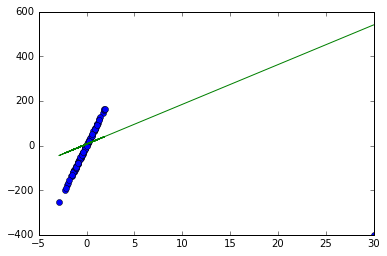

In [86]:
#Add a serious outlier and see what happens
x2[-1] = 30
y2[-1] = -400

#Create a plot that shows how the prediction can be very wrong in the presence of a serious outlier.
plt.plot(x2,y2,'o')
plt.plot(x2,regr.predict(x2))

## Problem 3: Implement Linear regression

In class you looked at performing regression using gradient descent. Now you are going to implement it.

Make sure to comment your code!

In [87]:
#Make a prediction function h
def prediction_function(x,theta0,theta1):
    # Make hypothesis function by using np.add and np.multiply bcs you work with arrays
    h = np.add(theta0, np.multiply(theta1, x))
    return h

In [88]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
    # Declare how many inputs
    m = y.shape[0]
    # Calculate cost function using np.smth bcs you work with arrays and return J
    J = (1.0/(2*m)) * np.sum(np.square(np.subtract(x_predict,y)))
    return J

In [89]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict,y, x):
    # Declare how many inputs
    m = y.shape[0]
    # Calculate derivatives regarding theta0 and theta1
    theta0_rel = (1.0/m)* np.sum(np.subtract(x_predict, y))
    theta1_rel = (1.0/m)* np.sum(np.multiply(np.subtract(x_predict, y), x))
    # Declare gradient and return
    gradient = (theta0_rel, theta1_rel)
    return gradient

4074.18935635
3418.45839177
2868.68495614
2407.73846044
2021.25964188
1697.21189597
1425.50530941
1197.6816015
1006.65009712
846.466457434


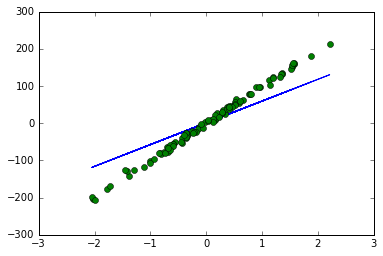

In [121]:
#These are some default parameters, see how playing with them affects the behavior
alpha = 0.1
theta0 = 0
theta1 = 1
# Manipulate x so that x and y have same dimensions
x = np.transpose(x1)[0]
y = y1
iterations = 10
#Fill in the stopcondition yourself
stopcondition = 0.1

i = 0
cost = 10
#Try to save the output of the cost function at each iteration and plot it at the end
while (i < iterations) and (cost > stopcondition):
    i = i + 1
    #Put everything together here
    # Make the hypothesis function h 
    h = prediction_function(x,theta0,theta1)
    # Implement h in the cost function 
    cost = cost_function(h,y)
    # Calculate new theta0 and theta1
    a = theta0 - alpha * compute_gradient(h,y,x)[0]
    b = theta1 - alpha * compute_gradient(h,y, x)[1]
    theta0 = a
    theta1 = b
    # To see how the cost changes per iteration
    print cost
    
plt.plot(x,prediction_function(x,theta0,theta1))
plt.plot(x,y,'o')
plt.show()

## Problem 4
So the higher the amount of iterations the better the hypothesis function fits the data. I tried for 5 iterations to 40 iterations and for 40 iterations the fit is almost perfect (using learning rate 0.1). 

I studied the influence of the learning rate while using 10 iterations every time. I found that if you use a really small learning rate from 0.01 to 0.1 the fit is definitely not perfect but if you then use a bigger learning rate of 1 the fit is almost perfect. Then again if you choose a learning rate bigger than 2, the fit gets worse again. These are logical results: when you use the small learning rate 10 iterations are just too little to reach the right thetas, while when you use the learning rate bigger than 2 you probably overshoot the point where the cost is near 0.

The cost function (learning rate is 0.1 and 40 iterations) naturally goes down with each iteration, but since the derivative becomes smaller and smaller, the decrease of the cost per iteration also becomes smaller --> till in the end it goes down with approximately 1, while the starting step was approximately 600. 






# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.